# Case 1 model in predicting TOC - Linear Regression

## loading the Libraries and Dataset

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
coreDataPrepared=pd.read_csv('CoredataTmax.csv')

In [3]:
coreDataPrepared.head()

,Well,CRC Lib #,Formation,Sample Type,GR,ILD,Porosity,HCl Reaction,Avg. Depth,Leco TOC (%),S1,S2,S3,Tmax (°C),HI,OI,S1+S2,PI
0,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,Buffalo Gap Federal 35-1,T120,MWRY,core,230.484523,11.470472,9.500998,1,11145.1,0.55,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
data=coreDataPrepared[['GR','ILD','Porosity','Avg. Depth','Leco TOC (%)']]

In [5]:
data.dropna(inplace=True)

<ipython-input-5-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [6]:
data=data[data['Porosity']<31]
data=data[(data['Avg. Depth']>7000)&(data['ILD']<400)&(data['Leco TOC (%)']<10)]
data.reset_index(inplace=True)

In [7]:
data

,index,GR,ILD,Porosity,Avg. Depth,Leco TOC (%)
0,0,230.484523,11.470472,9.500998,11145.1,0.55
1,1,230.484523,11.470472,9.500998,11145.1,0.55
2,2,230.484523,11.470472,9.500998,11145.1,0.55
3,3,230.484523,11.470472,9.500998,11145.1,0.55
4,4,230.484523,11.470472,9.500998,11145.1,0.55
...,...,...,...,...,...,...
9850,9995,105.054811,9.725226,10.592800,9227.0,2.30
9851,9996,113.135171,51.706493,9.700599,11170.0,1.83
9852,9997,157.069571,30.067157,9.500998,11343.2,1.77
9853,9998,144.028221,49.117105,7.704591,11255.5,2.61


In [8]:
data.drop(['index'],axis=1,inplace=True)


In [9]:
data

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%)
0,230.484523,11.470472,9.500998,11145.1,0.55
1,230.484523,11.470472,9.500998,11145.1,0.55
2,230.484523,11.470472,9.500998,11145.1,0.55
3,230.484523,11.470472,9.500998,11145.1,0.55
4,230.484523,11.470472,9.500998,11145.1,0.55
...,...,...,...,...,...
9850,105.054811,9.725226,10.592800,9227.0,2.30
9851,113.135171,51.706493,9.700599,11170.0,1.83
9852,157.069571,30.067157,9.500998,11343.2,1.77
9853,144.028221,49.117105,7.704591,11255.5,2.61


In [10]:
X=data.drop(['Leco TOC (%)'],axis=1)
y=data['Leco TOC (%)']

In [11]:
X

,GR,ILD,Porosity,Avg. Depth
0,230.484523,11.470472,9.500998,11145.1
1,230.484523,11.470472,9.500998,11145.1
2,230.484523,11.470472,9.500998,11145.1
3,230.484523,11.470472,9.500998,11145.1
4,230.484523,11.470472,9.500998,11145.1
...,...,...,...,...
9850,105.054811,9.725226,10.592800,9227.0
9851,113.135171,51.706493,9.700599,11170.0
9852,157.069571,30.067157,9.500998,11343.2
9853,144.028221,49.117105,7.704591,11255.5


<AxesSubplot:>

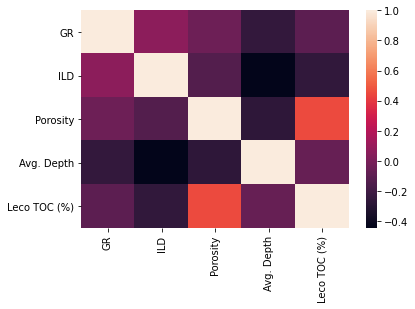

In [12]:
sns.heatmap(data.corr())

### splitting the datasets into training and testing 

In [12]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

### Rescaling the Model

In [13]:
scaler = preprocessing.StandardScaler()

In [14]:
X=scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=42)

### training the model

In [16]:
lin_mod = linear_model.LinearRegression(fit_intercept = True)
lin_mod.fit(X_train, y_train)

LinearRegression()

In [17]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

1.9141052025124239
[-0.07723833 -0.20673254  0.34523808 -0.06731246]


### Evaluate the model

In [18]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 4)   

Mean Square Error      = 0.5478775653470621
Root Mean Square Error = 0.7401875203940297
Mean Absolute Error    = 0.5604930120022467
Median Absolute Error  = 0.394282601468499
R^2                    = 0.24112300728141467
Adjusted R^2           = 0.23996559448113214


In [19]:
X_train

array([[-0.24206427,  4.72879428, -0.36771097, -2.84239672],
       [-0.22713661, -0.42421697,  0.58284071, -0.37375148],
       [-0.40390066, -0.11864246, -0.85600547,  0.43612134],
       ...,
       [ 0.55706721, -0.3405133 ,  0.84193034, -0.12788281],
       [-0.19580099,  5.41106469, -0.48793067, -2.84441534],
       [ 0.18644449,  0.13970566, -0.94842213,  0.6523835 ]])

## Other Models -Random Forest Regressor 

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rf=RandomForestRegressor(random_state=42)

In [22]:
rfModel=rf.fit(X_train,y_train)

In [23]:
#Do predictions

In [24]:
y_pred_r=rfModel.predict(X_test)

### Model Evaluation

In [25]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 0.08768816860201056
Root Mean Square Error = 0.29612188132931105
Mean Absolute Error    = 0.09285991219902497
Median Absolute Error  = 0.008612947708187768
R^2                    = 0.878541232759658
Adjusted R^2           = 0.8783559880714419


### Optimization Model techniques

#### Cross Validation in sklearn

##### Using K-Fold CV

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [27]:
lm = rfModel
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores.mean()

0.8774518489456341

### 2.Hyperparameter Tuning Using Grid Search Cross-Validation

A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [28]:
X_train.shape

(7884, 4)

In [29]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 5))}]


# step-3: perform grid search
# 3.1 specify model
lm = rfModel
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor(random_state=42)),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4]}],
             return_train_score=True, scoring='r2', verbose=1)

In [30]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,1.846116,0.066145,0.014663,0.001267,1,{'n_features_to_select': 1},0.925603,0.871898,0.895783,0.883014,...,0.925618,0.924543,0.925100,0.925474,0.929102,0.925488,0.928200,0.924850,0.926357,0.001956
1,1.527070,0.053852,0.016757,0.001828,2,{'n_features_to_select': 2},0.904315,0.868476,0.889623,0.899061,...,0.956718,0.956925,0.956558,0.957833,0.958362,0.956901,0.959004,0.958058,0.957867,0.001429
2,1.110472,0.030597,0.017449,0.001422,3,{'n_features_to_select': 3},0.882963,0.869944,0.878250,0.901707,...,0.956658,0.957071,0.956828,0.958030,0.958000,0.957264,0.959325,0.957939,0.957994,0.001407
3,0.601500,0.030600,0.017368,0.000790,4,{'n_features_to_select': 4},0.891243,0.867149,0.844272,0.889972,...,0.956761,0.956733,0.956869,0.957615,0.957714,0.956870,0.958959,0.957335,0.957690,0.001295


In [31]:
cv_results["mean_test_score"]

0    0.898220
1    0.889317
2    0.883319
3    0.877657
Name: mean_test_score, dtype: float64

In [32]:
cv_results["mean_train_score"]

0    0.926357
1    0.957867
2    0.957994
3    0.957690
Name: mean_train_score, dtype: float64

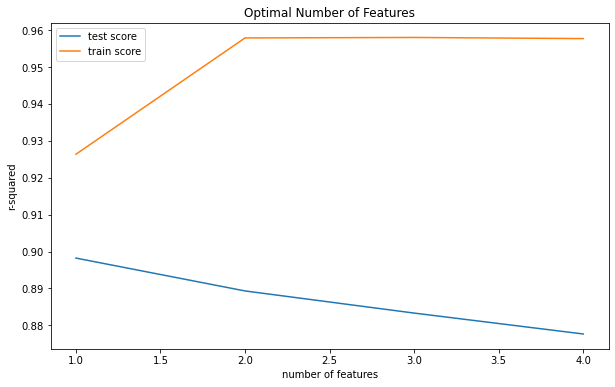

In [33]:
# plotting cv results
plt.figure(figsize=(10,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
# final model
n_features_optimal = 2

lm1 = rfModel
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, n_features_to_select=n_features_optimal)             
rfe1 = rfe.fit(X_train, y_train)


y_pred1 = lm.predict(X_test)
r21 = sklearn.metrics.r2_score(y_test, y_pred1)
print(r21)

0.878541232759658


### Random Hyperparameter Grid

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


#### Random Search training

In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

We can view the best parameters from fitting the random search:

In [37]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

From these results, we should be able to narrow the range of values for each hyperparameter.

### Evaluate Random Search

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} %.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [39]:
base_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
X_train

array([[-0.24206427,  4.72879428, -0.36771097, -2.84239672],
       [-0.22713661, -0.42421697,  0.58284071, -0.37375148],
       [-0.40390066, -0.11864246, -0.85600547,  0.43612134],
       ...,
       [ 0.55706721, -0.3405133 ,  0.84193034, -0.12788281],
       [-0.19580099,  5.41106469, -0.48793067, -2.84441534],
       [ 0.18644449,  0.13970566, -0.94842213,  0.6523835 ]])

In [41]:
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.0929 %.
Accuracy = 93.38%.


In [42]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.1029 %.
Accuracy = 92.46%.


### Grid Search with Cross Validation

In [43]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 30, 40, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [0, 2, 4],
    'n_estimators': [600, 800, 1500, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

This will try out 1 * 4 * 2 * 3 * 3 * 4 = 288 combinations of settings. We can fit the model, display the best hyperparameters, and evaluate performance:

In [44]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
288 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\eobasi\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\eobasi\Anaconda3\lib\site-pac

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [45]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test, y_test)

Model Performance
Average Error: 0.0962 %.
Accuracy = 92.91%.


In [46]:
y_pred_r=best_grid.predict(X_test)

In [47]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred_r, 4)

Mean Square Error      = 0.09084178095230883
Root Mean Square Error = 0.3013997029731596
Mean Absolute Error    = 0.09623465534095
Median Absolute Error  = 0.009615629305345763
R^2                    = 0.8741730965044738
Adjusted R^2           = 0.8739811896867379


### Applying Support vector regression

#### feature Scaling:

In [39]:
scaler = preprocessing.StandardScaler()

In [40]:
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1.94 1.52 1.84 ... 1.65 1.52 2.2 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Training the dataset:

In [48]:
from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)

SVR()

#### Predicting the result:

In [49]:
y_pred = regrassor.predict(X_test)


In [50]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred, 4)

Mean Square Error      = 0.3527759308233721
Root Mean Square Error = 0.5939494345677686
Mean Absolute Error    = 0.4130565808697232
Median Absolute Error  = 0.2560773013788298
R^2                    = 0.5113624750866504
Adjusted R^2           = 0.5106172221254202


### Gradient Boosting Algorithms

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [52]:
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}


In [53]:
gbr = GradientBoostingRegressor(**gbr_params)

In [54]:
gbr.fit(X_train, y_train)

C:\Users\eobasi\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.01, loss='ls', min_samples_split=5,
                          n_estimators=1000)

#### Model Evaluation

In [55]:
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))

Model Accuracy: 0.756


##### Determine the Features Importance

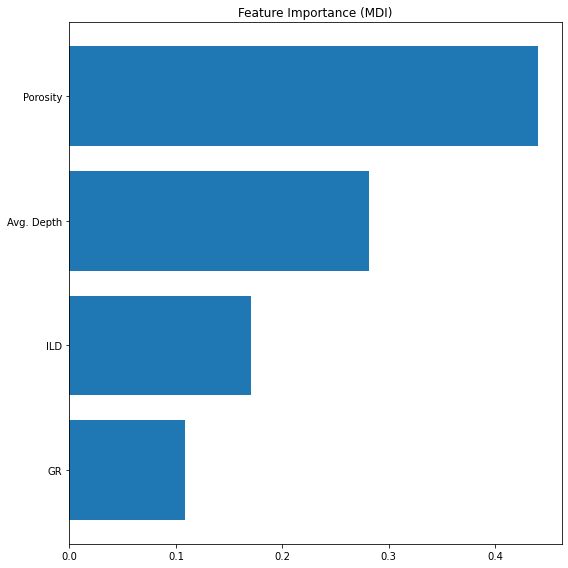

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance =base_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

In [57]:
data

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%)
0,230.484523,11.470472,9.500998,11145.1,0.55
1,230.484523,11.470472,9.500998,11145.1,0.55
2,230.484523,11.470472,9.500998,11145.1,0.55
3,230.484523,11.470472,9.500998,11145.1,0.55
4,230.484523,11.470472,9.500998,11145.1,0.55
...,...,...,...,...,...
9850,105.054811,9.725226,10.592800,9227.0,2.30
9851,113.135171,51.706493,9.700599,11170.0,1.83
9852,157.069571,30.067157,9.500998,11343.2,1.77
9853,144.028221,49.117105,7.704591,11255.5,2.61


##### Assessing the Training & Test Deviance

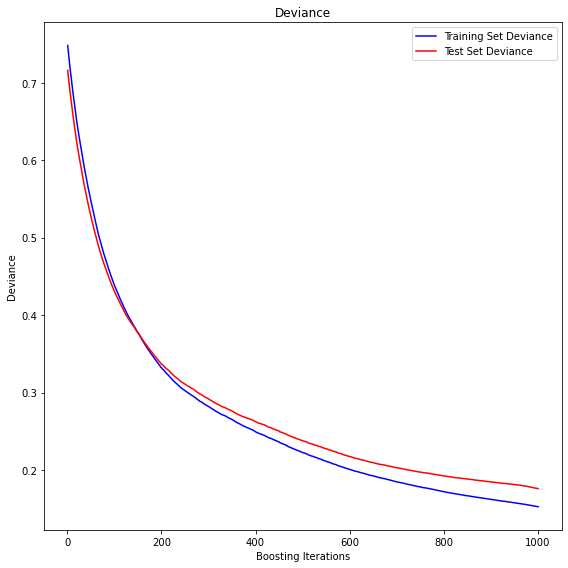

In [58]:
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

### Xgboosting and  bayesian optimization

In [ ]:
pip install xgboost

In [59]:
# check xgboost version
import xgboost as xg
print(xg.__version__)


1.5.2


In [16]:
from xgboost import XGBRegressor

In [17]:
eval_set = [(X_test, y_test)]

In [18]:
model = XGBRegressor(max_depth=14,learning_rate=0.0500000012,min_child_weight=5,n_estimators=500,subsample=0.5,)

In [19]:
model.fit(X_train, y_train,eval_metric="error",eval_set=eval_set,verbose=False)

C:\Users\eobasi\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=14, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [20]:
y_predictions=model.predict(X_test)
y_predictedTrain=model.predict(X_train)

In [21]:
accuracy = evaluate(model, X_test, y_test)

print("Accuracy: %.2f%%" % (accuracy ))

NameError: name 'evaluate' is not defined

### evaluate models

In [22]:
def print_metrics(y_true, y_predicted,y_predictedTrain,y_train,n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2train = sklm.r2_score(y_train, y_predictedTrain)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    r2_adjT = r2train - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 -  r2train)
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('R^2 train              = ' + str(r2_adjT))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_predictions,y_predictedTrain,y_train, 4)

Mean Square Error      = 0.08035962195006655
Root Mean Square Error = 0.2834777274320975
Mean Absolute Error    = 0.08703700218933721
Median Absolute Error  = 0.011476602554321147
R^2                    = 0.8886921602587647
R^2 train              = 0.9649348069388646
Adjusted R^2           = 0.8885223974121843


In [67]:
lm = model
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores

array([0.8597427 , 0.87906289, 0.91611495, 0.91695412, 0.89565398,
       0.92033404, 0.88243967, 0.93534925, 0.9171774 , 0.83254918])

In [68]:
scores.mean()

0.8955378171427839

In [69]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 5))}]


# step-3: perform grid search
# 3.1 specify model
lm = model
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=XGBRegressor(base_score=0.5,
                                                  booster='gbtree',
                                                  colsample_bylevel=1,
                                                  colsample_bynode=1,
                                                  colsample_bytree=1,
                                                  enable_categorical=False,
                                                  gamma=0, gpu_id=-1,
                                                  importance_type=None,
                                                  interaction_constraints='',
                                                  learning_rate=0.0500000012,
                                                  max_delta_step=0,
                                                  max_depth=14,
                                                  min_child_weight=5,
           

In [70]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,13.954730,0.485940,0.010469,0.001497,1,{'n_features_to_select': 1},0.922859,0.870704,0.892978,0.876850,...,0.923096,0.920655,0.920448,0.921222,0.927310,0.921650,0.923620,0.920794,0.922557,0.002293
1,10.551020,0.438418,0.011465,0.002149,2,{'n_features_to_select': 2},0.916026,0.877940,0.909952,0.908172,...,0.961489,0.961453,0.960314,0.962246,0.962601,0.961504,0.963629,0.961333,0.962133,0.001509
2,7.121975,0.202259,0.011864,0.001439,3,{'n_features_to_select': 3},0.903481,0.872629,0.905597,0.909553,...,0.963070,0.963616,0.962305,0.964188,0.963902,0.963139,0.965458,0.963476,0.963976,0.001535
3,3.692534,0.153838,0.012466,0.002196,4,{'n_features_to_select': 4},0.906539,0.870778,0.889197,0.899280,...,0.964453,0.964808,0.963752,0.965722,0.965455,0.964343,0.966798,0.964953,0.965370,0.001497


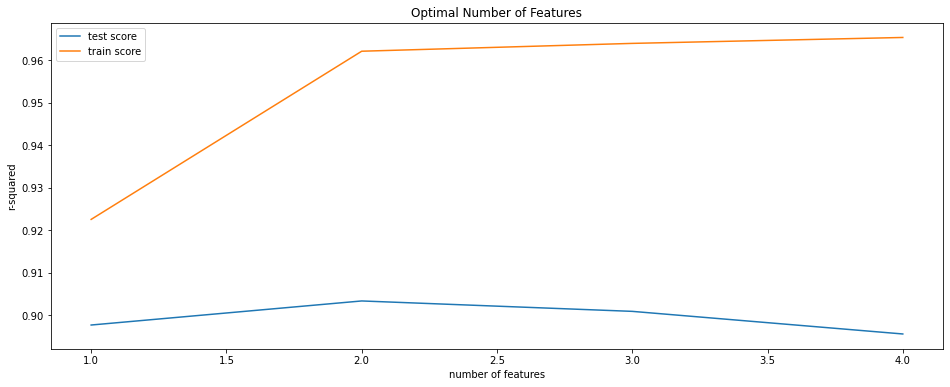

In [71]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [72]:
# final model
n_features_optimal = 4

lm1 = model_cv
lm1.fit(X_train, y_train)

rfe1 = RFE(lm1, n_features_to_select=n_features_optimal)             
rfe1 = rfe.fit(X_train, y_train)


y_pred1 = rfe1.predict(X_test)
r21 = sklearn.metrics.r2_score(y_test, y_pred1)
print(r21)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
0.8899780653439936


In [73]:
Original=pd.read_csv('TrainingDataTOC.csv')

In [97]:
Original=Original[['GR','ILD','Porosity','Avg. Depth','Leco TOC (%)']]
Original=Original[Original['Leco TOC (%)']<10]
Original=Original[Original['Porosity']<31]
Original=Original[(Original['Avg. Depth']>7000)&(Original['Leco TOC (%)']<10)&(Original['ILD']<400)]
Original=Original[Original['ILD']<300]

In [98]:
X=Original.drop(['Leco TOC (%)'],axis=1)

In [76]:
xgb.DMatrix(X)

NameError: name 'xgb' is not defined

In [99]:
X=scaler.fit_transform(X)
Original_TOC=rfe1.predict(X)
Original['TOC_Predicted']=Original_TOC
Original

,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),TOC_Predicted
0,120.992756,17.895352,6.406021,11029.70,1.90,1.555975
1,130.195254,23.630048,8.799609,11074.70,1.68,1.707557
2,138.980399,38.257813,9.401198,11154.60,0.68,0.714855
3,132.187212,51.405548,10.000000,11161.50,2.89,1.800262
4,142.613492,44.098333,7.704591,11225.15,2.61,1.714930
...,...,...,...,...,...,...
181,185.618159,11.099048,13.012418,8404.00,2.53,0.980814
182,187.314835,4.984635,15.640731,8407.00,5.78,0.381343
183,142.960501,8.684094,9.510496,8105.00,0.48,1.190168
186,122.672031,5.202351,18.448286,8227.00,5.23,1.443606


In [103]:
z=Original.sample(100)

In [104]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(z['Leco TOC (%)'], z['TOC_Predicted'], 4)

Mean Square Error      = 1.2979596741371433
Root Mean Square Error = 1.1392803316730888
Mean Absolute Error    = 0.7976235771656037
Median Absolute Error  = 0.6362275648117064
R^2                    = -0.42348742127970684
Adjusted R^2           = -0.46797140319469765


In [24]:
import matplotlib as mpl

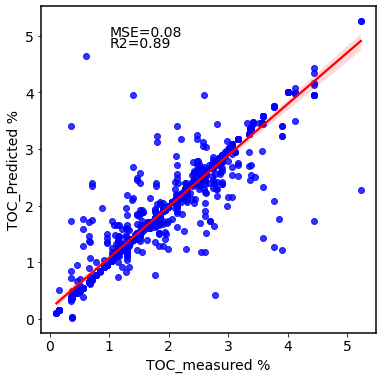

In [30]:
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(6,6))
sns.regplot(y_test, y_predictions,color='blue',line_kws={'color': 'red'},ci=100)
plt.text(1,5,'MSE=0.08')
plt.text(1,4.8,'R2=0.89')
plt.xlabel('TOC_measured %')
plt.ylabel('TOC_Predicted %')
#plt.title('Model_evaluation')
plt.savefig('xgboost.png',bbox_inches='tight',dpi=300, )
plt.show()
#sns.scatterplot(y_test, y_pred1)

## LightGBM Regressor

In [368]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [88]:
import lightgbm as lgb

In [89]:
dtrain = lgb.Dataset(data=X_train, label=y_train)

def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      
        params = {'application':'regression','num_iterations': 5000,
                  'learning_rate':0.05, 'early_stopping_round':50,
                  'metric':'l1'} # Default parameters
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight
        cv_result = lgb.cv(params, dtrain, nfold=5, seed=random_seed, stratified=False, verbose_eval =None, metrics=['l1'])
        
        return -np.min(cv_result['l1-mean'])
        

In [90]:
from lightgbm import LGBMRegressor

In [91]:
model3=LGBMRegressor()
model3.fit(X_train,y_train)
predict3=model3.predict(X_test)

In [92]:
def print_metrics(y_true, y_predicted,y_predictedTrain,y_train,n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2train = sklm.r2_score(y_train, y_predictedTrain)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    r2_adjT = r2train - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 -  r2train)
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('R^2 train              = ' + str(r2_adjT))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, predict3,y_predictedTrain,y_train, 4)

Mean Square Error      = 0.08910698393942132
Root Mean Square Error = 0.2985079294414494
Mean Absolute Error    = 0.11341998954007768
Median Absolute Error  = 0.03208032846281794
R^2                    = 0.8765760011375251
R^2 train              = 0.9649348069388646
Adjusted R^2           = 0.8763877591463775


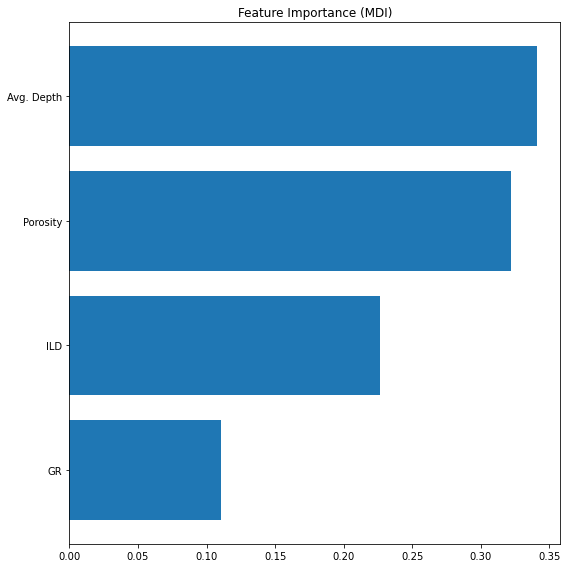

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance =model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(lm1, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

#### Bayesian Optimization of XGBoost Parameters

In [59]:
from __future__ import print_function

import numpy as np
import pandas as pd
import gc
import warnings

from bayes_opt import BayesianOptimization

from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import log_loss, matthews_corrcoef, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import contextlib            

In [60]:
def XGB_CV(
          max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree
         ):

    global AUCbest
    global ITERbest
    
    paramt = {
              'booster' : 'gbtree',
              'max_depth' : int(max_depth),
              'gamma' : gamma,
              'eta' : 0.1,
              'objective' : 'binary:logistic',
              'nthread' : 4,
              'silent' : True,
              'eval_metric': 'auc',
              'subsample' : max(min(subsample, 1), 0),
              'colsample_bytree' : max(min(colsample_bytree, 1), 0),
              'min_child_weight' : min_child_weight,
              'max_delta_step' : int(max_delta_step),
              'seed' : 1001
              }

    folds = 5
    cv_score = 0

    print("\n Search parameters (%d-fold validation):\n %s" % (folds, paramt), file=log_file )
    log_file.flush()

    xgbc = xgb.cv(
                    paramt,
                    dtrain,
                    num_boost_round = 20000,
                    stratified = False,
                    nfold = folds,
                    #verbose_eval = 10,
                    early_stopping_rounds = 100,
                    metrics = 'rmse',
                    show_stdv = True
               )
    val_score = xgbc['test-auc-mean'].iloc[-1]
    train_score = xgbc['train-auc-mean'].iloc[-1]
    print(' Stopped after %d iterations with train-auc = %f val-auc = %f ( diff = %f ) train-gini = %f val-gini = %f' % ( len(xgbc), train_score, val_score, (train_score - val_score), (train_score*2-1),
    (val_score*2-1)) )
    if ( val_score > AUCbest ):
        AUCbest = val_score
        ITERbest = len(xgbc)

    return (val_score*2) - 1

In [61]:
log_file = open('Porto-AUC-5fold-XGB-run-01-v1-full.log', 'a')
AUCbest = -1.
ITERbest = 0

In [62]:
dtrain = xgb.DMatrix(X_train, label = y_train)

In [63]:
XGB_BO = BayesianOptimization(XGB_CV, {
                                     'max_depth': (2, 12),
                                     'gamma': (0.001, 10.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree' :(0.4, 1.0)
                                    })

In [64]:
XGB_BO.explore({
              'max_depth':            [3, 8, 3, 8, 8, 3, 8, 3],
              'gamma':                [0.5, 8, 0.2, 9, 0.5, 8, 0.2, 9],
              'min_child_weight':     [0.2, 0.2, 0.2, 0.2, 12, 12, 12, 12],
              'max_delta_step':       [1, 2, 2, 1, 2, 1, 1, 2],
              'subsample':            [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'colsample_bytree':     [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              })

AttributeError: 'BayesianOptimization' object has no attribute 'explore'

In [65]:
print('-'*130)
print('-'*130, file=log_file)
log_file.flush()

with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    XGB_BO.maximize(init_points=2, n_iter=5, acq='ei', xi=0.0)

# XGB_BO.maximize(init_points=10, n_iter=50, acq='ei', xi=0.0)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ei', xi=0.01)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=10)
# XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=1)

----------------------------------------------------------------------------------------------------------------------------------
|   iter    |  target   | colsam... |   gamma   | max_de... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
[19:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBoostError: [19:04:25] C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:120: label must be in [0,1] for logistic regression

In [66]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [67]:
dtest = xgb.DMatrix(X_test)

In [68]:
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [69]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -0.3876   |  0.6876   |  0.8819   |  4.139    |
|  2        | -0.4441   |  0.3541   |  0.2351   |  3.978    |
|  3        | -0.4147   |  0.4691   |  0.9389   |  4.936    |
|  4        | -0.4025   |  0.6421   |  0.07573  |  3.638    |
|  5        | -0.3593   |  0.7598   |  0.5934   |  4.065    |
|  6        | -0.3645   |  0.8242   |  0.6603   |  4.08     |
|  7        | -0.3554   |  0.8717   |  0.4848   |  4.067    |
|  8        | -0.3956   |  0.8958   |  0.5291   |  3.871    |


Extract the parameters of the best model.

In [70]:
params = xgb_bo.res['max']['max_params']

TypeError: list indices must be integers or slices, not str

In [71]:
params=xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])

#### Testing

In [72]:
# Train a new model with the best parameters from the search
model2 = xgb.train(params, dtrain, num_boost_round=250)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.339949161119791
0.24508954420070014


In [73]:
y_pred = model2.predict(dtest)

In [74]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

print_metrics(y_test, y_pred, 4)

Mean Square Error      = 0.11556543214604964
Root Mean Square Error = 0.339949161119791
Mean Absolute Error    = 0.17390810313977695
Median Absolute Error  = 0.08179510116577138
R^2                    = 0.8160627618008334
Adjusted R^2           = 0.8153507466852237


In [93]:
R_score=[0.16,0.87,0.81,0.51, 0.763,0.89,0.83]

In [94]:
column=['LinearReg','RandomForest','OptimedRF','SVR','GBR','XGBoost','XGB_BO']

<ipython-input-95-300980d5a9e1>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(column,R_score,width=0.6,color='rgbkymc')
No handles with labels found to put in legend.


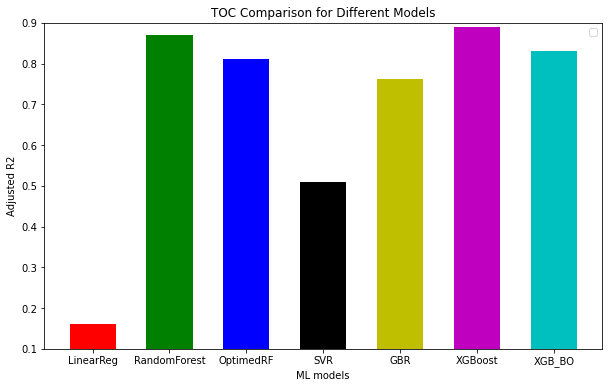

In [95]:
plt.figure(figsize=(10,6))
plt.bar(column,R_score,width=0.6,color='rgbkymc')
plt.xlabel('ML models')
plt.ylabel('Adjusted R2')
plt.title('TOC Comparison for Different Models')
plt.ylim(0.1,0.9)
plt.legend()
plt.show()


## Saving your models:

In [96]:
import pickle

In [111]:
filename='TOC_modelupdated.sav'
pickle.dump(model,open(filename,'wb'))

In [112]:
y_predictions=model.predict(X_test)

In [113]:
y_predictions

array([2.850064 , 1.2890893, 0.9591646, ..., 1.2824692, 1.5671608,
       1.8472995], dtype=float32)

In [1]:
R_score=[0.16,0.87,0.81,0.51, 0.763,0.89,0.83]
column=['LinearReg','RandomForest','OptimedRF','SVR','GBR','XGBoost','XGB_BO']

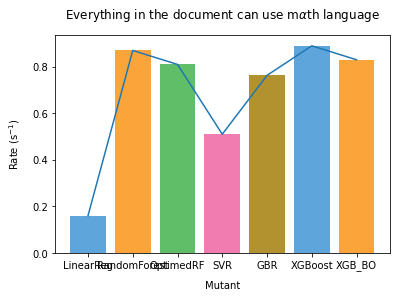

In [11]:
import matplotlib
import matplotlib.pyplot as plt

#data = [220,14.2,150,400,420]
error = [10, 1, 20, 60, 10]
x = [i + .5 for i in range(5)]
colors = ['#5DA5DA', '#FAA43A', '#60BD68', '#F17CB0', '#B2912F']

fig, ax = plt.subplots()
bar = ax.bar(column, R_score, 0.8, align="center",color=colors,)
plot = ax.plot(column, R_score)
ax.set_xticks(column)
ax.set_xticklabels(column)
ax.set_title(r"Everything in the document can use m$\alpha$th language", y=1.05)
ax.set_ylabel(r"Rate (s$^{-1}$)", labelpad=10)
ax.set_xlabel("Mutant",labelpad=10)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig('test.svg')
plt.show()
